# LetsGrowMore

TASK 1: IRIS FLOWER CLASSIFICATION

DONE BY: MEERA P V


#### IMPORT REQUIRED LIBRARIES

In [163]:
import numpy as np
import pandas as pd
from io import StringIO


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
import graphviz
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import jaccard_score, f1_score, log_loss

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#### IMPORT DATASET : 

In [164]:
data = pd.read_excel("Iris_Plants_Database.xlsx")
data

,Sepal_length(cm),Sepal_width(cm),Petal_lengthcm),Petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### EDA

In [165]:
data.head()

,Sepal_length(cm),Sepal_width(cm),Petal_lengthcm),Petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [166]:
data.shape

(150, 5)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sepal_length(cm)  150 non-null    float64
 1   Sepal_width(cm)   150 non-null    float64
 2   Petal_lengthcm)   150 non-null    float64
 3   Petal_width(cm)   150 non-null    float64
 4   class             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [168]:
data.describe()

,Sepal_length(cm),Sepal_width(cm),Petal_lengthcm),Petal_width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [169]:
data.isnull().sum()

Sepal_length(cm)    0
Sepal_width(cm)     0
Petal_lengthcm)     0
Petal_width(cm)     0
class               0
dtype: int64

In [170]:
data.value_counts("class")

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [171]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

##### Relation between variables

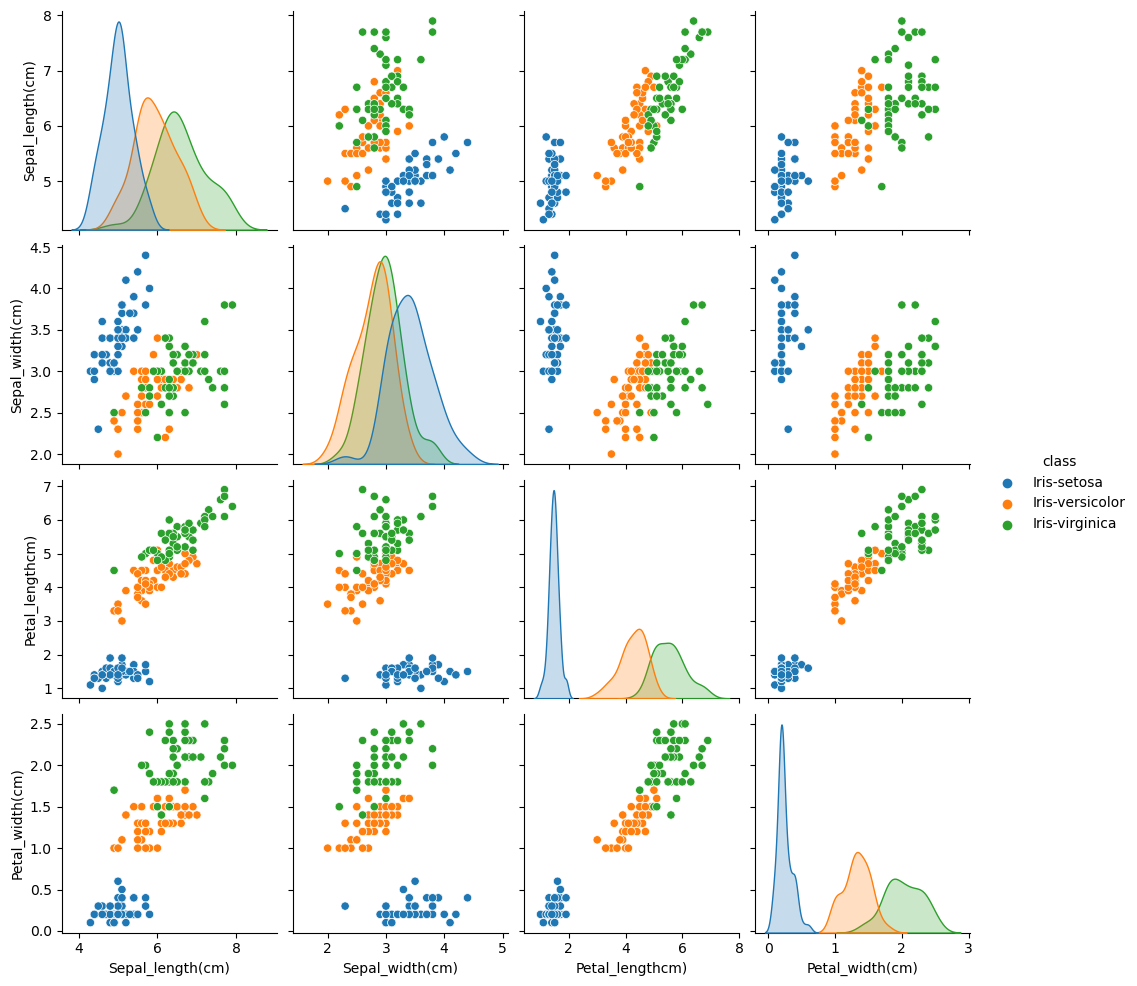

In [172]:
sns.pairplot(data=data,hue='class')

<AxesSubplot:xlabel='class', ylabel='count'>

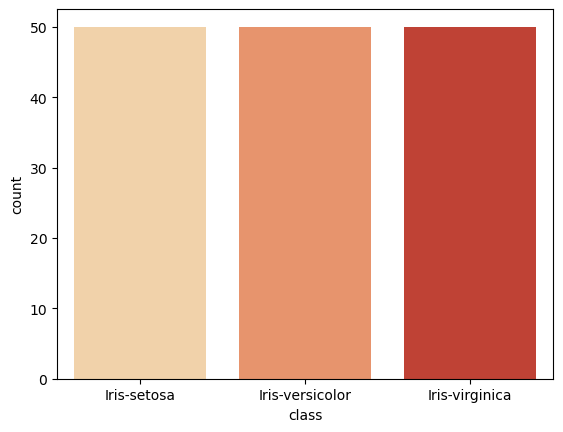

In [173]:
sns.countplot(x='class',data=data, palette="OrRd")

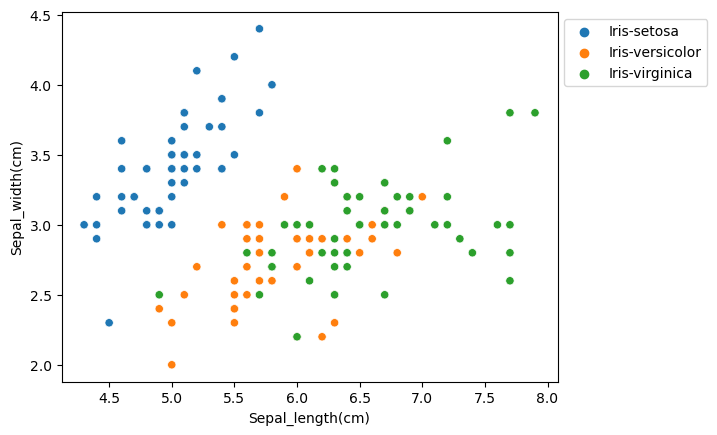

In [174]:
sns.scatterplot(x='Sepal_length(cm)', y='Sepal_width(cm)',
                hue='class', data=data, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

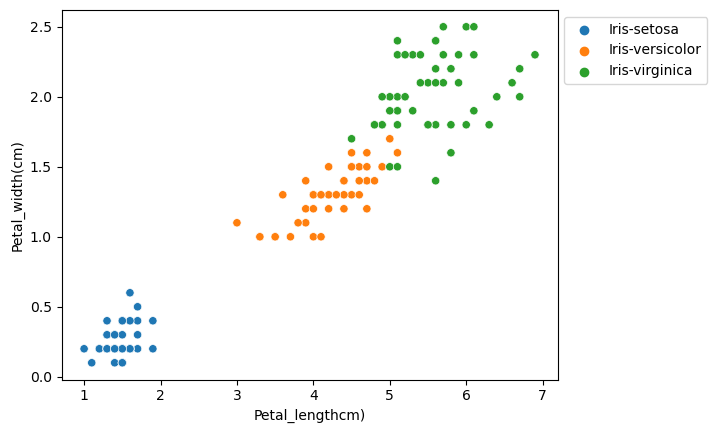

In [175]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.scatterplot(x='Petal_lengthcm)', y='Petal_width(cm)',
                hue='class', data=data, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

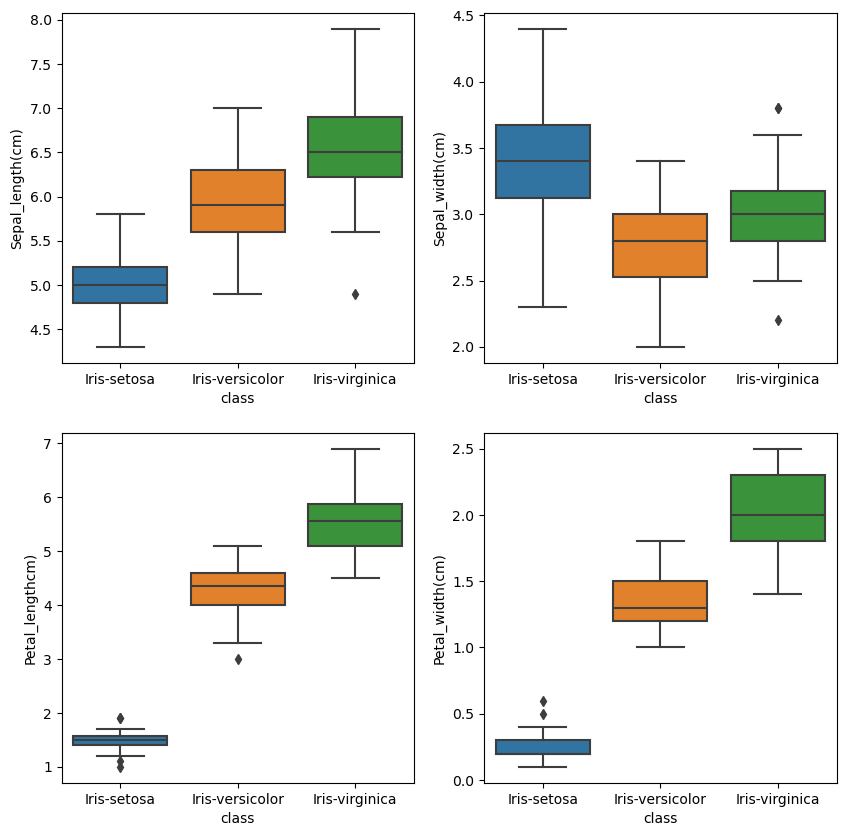

In [176]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
def graph(y):
    sns.boxplot(x="class", y=y, data=data)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('Sepal_length(cm)')
 
plt.subplot(222)
graph('Sepal_width(cm)')
 
plt.subplot(223)
graph('Petal_lengthcm)')
 
plt.subplot(224)
graph('Petal_width(cm)')
 
plt.show()

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sepal_length(cm)  150 non-null    float64
 1   Sepal_width(cm)   150 non-null    float64
 2   Petal_lengthcm)   150 non-null    float64
 3   Petal_width(cm)   150 non-null    float64
 4   class             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:>

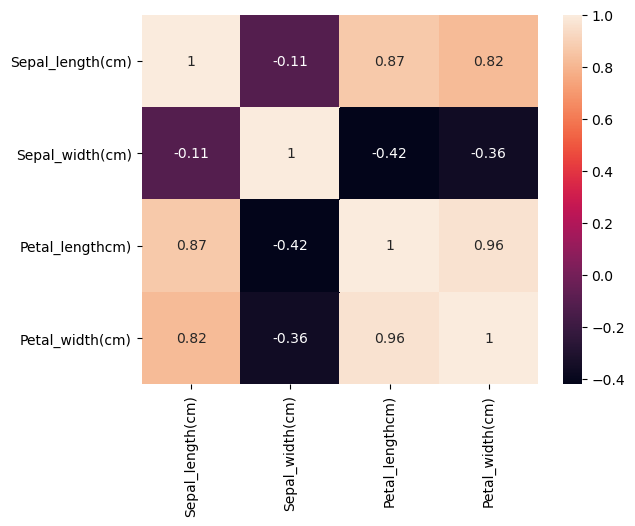

In [178]:
sns.heatmap(data.corr(), annot=True)

In [179]:
data.corr() # will define the correlation between different attributes

,Sepal_length(cm),Sepal_width(cm),Petal_lengthcm),Petal_width(cm)
Sepal_length(cm),1.000000,-0.109369,0.871754,0.817954
Sepal_width(cm),-0.109369,1.000000,-0.420516,-0.356544
Petal_lengthcm),0.871754,-0.420516,1.000000,0.962757
Petal_width(cm),0.817954,-0.356544,0.962757,1.000000


There are 150 Observations with 5 attributes. Four of them are numerical and one is categorical variable. There are no null-values. Each class of Iris flowers consists of 50 samples each. The data seems to highly correleated with each other

### Pre-Processing

In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['class'])
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Training and Testing Data

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


In [182]:
np.unique(y_test, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([17, 14, 14], dtype=int64))

##### Normalize the feature set X_train and X_test:

In [183]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train[0:5]

array([[ 0.68955032,  0.31339687,  0.3889435 ,  0.37346859],
       [-0.96174124,  0.55185102, -1.2284453 , -0.95582639],
       [ 0.18146061, -0.87887384,  0.73552681,  0.50639809],
       [-0.07258424, -0.87887384,  0.73552681,  0.90518658],
       [-0.58067396, -0.16351141,  0.3889435 ,  0.37346859]])

In [184]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test[0:5]

array([[-1.33519891,  0.39233578, -1.21491142, -1.22307682],
       [-1.33519891,  0.17437146, -1.15968817, -1.22307682],
       [-0.45323266,  0.82826443, -1.15968817, -0.96588777],
       [-0.89421579, -0.04359286, -1.10446493, -1.22307682],
       [-0.12249531,  3.00790765, -1.15968817, -0.96588777]])

### Model Selection

##### KNN

Since we know that there are 3 classes of iris flowers, we fix the k value to 3.

In [185]:
#Create an instance of the KNN classifier with k = 3
neigh = KNeighborsClassifier(n_neighbors = 3)

#Fit the model with the training data X_train and y_train
neigh.fit(X_train,y_train)

#Use the test data X_test to predict the output, yhat_KNN
yhat_KNN = neigh.predict(X_test)

#Use the real values y_test and the predicted values yhat_KNN to find the accuracy of the model 
print("Accuracy of the KNN model: ", accuracy_score(y_test, yhat_KNN))


Accuracy of the KNN model:  0.9111111111111111


##### Decision Tree:

In [186]:
#Create an instance of the decision tree classifier
dec_tree = DecisionTreeClassifier(criterion="entropy")

#Fit the model with the training data X_train and y_train
dec_tree.fit(X_train, y_train)

#Use the test data X_test to predict the output, yhat_tree
yhat_tree = dec_tree.predict(X_test)

#Use the real values y_test and the predicted values yhat_tree to find the accuracy of the model 
print("Accuracy of the Decision Tree: ", accuracy_score(y_test, yhat_tree))

Accuracy of the Decision Tree:  0.9333333333333333


##### Support Vector Machine:

In [187]:
#Create an instance of the svm classifier using the kernel function, rbf (Radial Basis Function)
svm_model = svm.SVC(kernel='rbf', gamma = 'auto')

#Fit the model with the training data X_train and y_train
svm_model.fit(X_train, y_train)

#Use the test data X_test to predict the output, yhat_svm
yhat_svm = svm_model.predict(X_test)

#Use the real values y_test and the predicted values yhat_svm to find the accuracy of the model 
print("Accuracy of the SVM Model :", accuracy_score(y_test, yhat_svm))

Accuracy of the SVM Model : 0.9111111111111111


##### Logistic Regression:

In [188]:
#Create an instance of the Logistic Regression classification model
#using the 'liblinear' optimizer and set C, the Inverse of regularization strength to 0.01
LR = LogisticRegression(C=0.01, solver='liblinear')

#Fit the model with the training data X_train and y_train
LR.fit(X_train,y_train)

#Use the test data X_test to predict the output, yhat_LR
yhat_LR = LR.predict(X_test)

#Use the real values y_test and the predicted values yhat_LR to find the accuracy of the model 
print("Accuracy of the SVM Model :", accuracy_score(y_test, yhat_LR))

Accuracy of the SVM Model : 0.8444444444444444


##### Random Forest:

In [189]:
#Create an instance of the Random Forest classification model
#using the 'liblinear' optimizer and set C, the Inverse of regularization strength to 0.01
RF = RandomForestClassifier(n_estimators=100, random_state=100)

#Fit the model with the training data X_train and y_train
RF.fit(X_train,y_train)

#Use the test data X_test to predict the output, yhat_LR
yhat_RF = RF.predict(X_test)

#Use the real values y_test and the predicted values yhat_LR to find the accuracy of the model 
print("Accuracy of the SVM Model :", accuracy_score(y_test, yhat_RF))

Accuracy of the SVM Model : 0.9111111111111111


##### RESULT

Comparing the scores and accuarcy of each model, it is seen the Decision Tree classification algorithm provides the highest accuracy for this problem using the Iris Data Set. From the decision tree model we found that it predicts 93.33% accuracy